# Part II - (General impact of macro-nutrients in the calories content of food)
## by (fumbah elvis nji)


## Investigation Overview

>We are  going to be presenting what we termed  high calories foods and their major calorific contributors, in essence,we  will be presenting to you our top calories food and the relationship with their major calorific components.

>During our exploration, we came out to discover what we could term as high calories foods and their major calorific contributors, we will be presenting to you our top calories food and the relation with their major calorific components.

>For the presentation, we will focus on just the influence of the proteins, fats on the calories level of food samples.
we will start by introducing the calorie variable, and  to display a list of high calories foods.

> Afterwards, I introduce each of the major nutrient (those which contributes to high calories content) to display a list of food samples in which this nutrient is found in abondance.I use the bar plots of each nutrient and calorie to display counts within specific calories bins

>After which we will proceed to display the relation between these 03 features with our main feature to show the following relationships that where found between our majors features and calories content:

>1. calories level increase only seemingly with carbohydrates
2. calories levels increase steeply with total fats
3. calories level also increase seemingly with calories but not as carbohydrates


## Dataset Overview

>source: Source: https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products/download?datasetVersionNumber=1

>After  data set collection from the specified URL, the followed issues where identified and fixed below exploration:

>1.  We replaced Null values in saturated fats columns with 0
2. - The was no category column in the data set, but we could notice that the first word of the description column was actually the category, we performed a loop and slice to produce a new column to this data set called food category
3. - the units of the of measurements of the nutrients in the data where not the same and not suitable for our analysis, some where in g, mg., mcg UI, etc. here, there was need for conversion of those unit to one identical unit (grams) to remove this inconsistent units in the whole dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
nutrients_df = pd.read_csv('nutrition.csv')

#Drop the serving_size column
nutrients_df.drop('serving_size', axis = 1, inplace = True)
#Fill the NaN value with 0
nutrients_df.fillna(0, inplace = True)

nutrients_df['food_categories'] = nutrients_df['name'].apply(lambda x: x.split(',')[0])



#we will use Regular Expression Module to help me clean the data
import re
#Loop in each non-numerical features except the name and food_categories feature 
for col in nutrients_df.drop(['name','food_categories'],axis = 1).select_dtypes(exclude = ['number']).columns:
    for i in nutrients_df[col]:
        if i == '0' or i == 0:
            pass
        else:
            point = re.findall('[a-zA-Z]+',i)[0]
            replace = []
            if point == 'mg':
                for j in nutrients_df[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:
                        replace.append(float(re.sub('[a-zA-Z]','',j))/1000)
            elif point == 'mcg':
                for j in nutrients_df[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:
                        replace.append(float(re.sub('[a-zA-Z]','',j))/1000000)  
            else:
                 for j in nutrients_df[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:       
                        replace.append(float(re.sub('[a-zA-Z]','',j)))
                        
            nutrients_df[col] = replace    
            nutrients_df.rename({col:col+'(g)'}, axis =1, inplace = True)
            break
            
            
            
## let a function to use to plot our distributions on vertical histogram
def show_distribution(feauture, binsize, unit=''):
    bins = np.arange(0, nutrients_df[feauture].max()+binsize, binsize)
    plt.figure(figsize=[10, 5])
    plt.hist(data = nutrients_df, x = feauture, bins = bins)
    plt.xlabel('{0}({1})'.format(feauture, unit))
    plt.ylabel('distribution')
    plt.legend()
    plt.title('distributions of {} in food samples'.format(feauture))
    plt.show()
    
    
def valuelabel(prop1,prop2):
    total = sum(prop1)
    for i, v in enumerate(prop1):
        plt.text(i/2, v, i, ha = 'center', bbox = dict(facecolor = 'cyan', alpha =0.8))  
    
    
#Specifying the limit
def get_outliers(feature):
    cal_Q1 = nutrients_df.describe()[feature]['25%']
    cal_Q3 = nutrients_df.describe()[feature]['75%']
    cal_IQR = cal_Q3 - cal_Q1
    return  nutrients_df[(nutrients_df[feature] < 1.5 * (cal_Q1 - cal_IQR)) | (nutrients_df[feature] > 1.5 * (cal_Q3 + cal_IQR)) ]['food_categories'].value_counts(ascending=True)

## (Visualization 1)

>we will start by see how The distribution of our main variable of interest looked skewed to the right with several peaks, this implies that there were few groups of food samples with quiet high calories ie above 400 calories , mean while most food samples have calories in the rage of 0 to 400 calories and some few samples went right up to 800 and 900 calories and we will show that they were oils and thier counter parts.

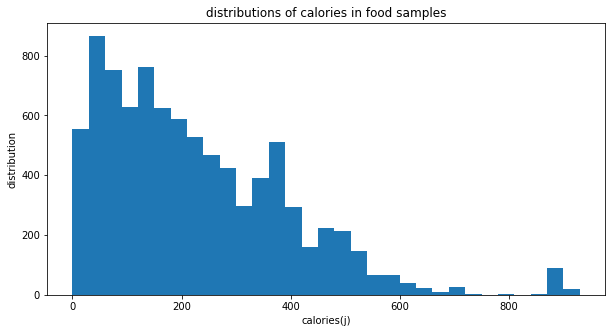

In [3]:
# start with a standard-scaled plot
show_distribution('calories', 30, 'j')

## (Visualization 2)

> Seing the skewed distribution prompted for further investogation where we filtered samples out of the interquatile ranges of calories distribution and we ended up to show that they were oils and thier counter parts.

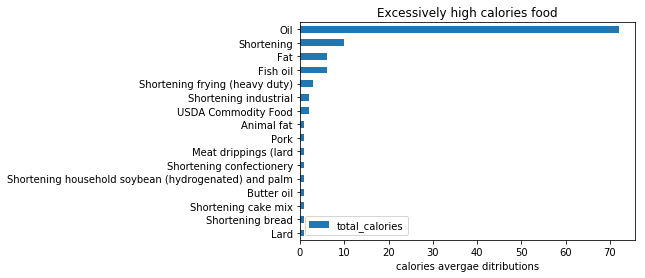

In [51]:
#sb.countplot(y=outliers_based_onCalories.index, x=outliers_based_onCalories.values)
outliers_based_onCalories_df = pd.DataFrame(get_outliers('calories'))
outliers_based_onCalories_df.set_axis(['total_{}'.format('calories')], axis='columns', inplace=True) 
   
## create figure
fig = plt.figure(figsize=[15, 10]);
_= outliers_based_onCalories_df.plot.barh(color = sb.color_palette()[0]);
_=plt.title('Excessively high calories food');
_=plt.xlabel('{} avergae ditributions'.format('calories'));
_=plt.show();

## (Visualization 3)
> A correlation existed between protein and calories, and since correlation was skewed to the right, we 
saw that, food samples were divided into 2 large groups: those with low protein (between 0 to around 18g) content and very few food samples had protein content greater than 18g. we could also notice some food samples with protein content seemingly high. which prompted more investigation at the end of which we found those high in protein are actually meat, Eggs, fish, soy, and their related.

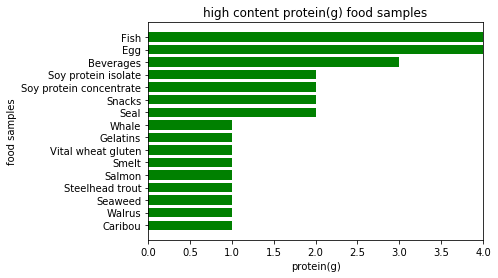

In [5]:
# fisrt 20 samples with exceeding high fats
outliers_based_pro_df = pd.DataFrame(get_outliers('protein(g)'))
outliers_based_pro_df.reset_index(inplace=True)
x = list(outliers_based_pro_df['index'])
y = list(outliers_based_pro_df['food_categories'])
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green", align='edge')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
#plt.xticks(np.arange(5),('Pre-clinical','Phase I','Phase II','Phase III', 'Approved'))
plt.margins(0,0.05)
plt.title('high content protein(g) food samples')
plt.ylabel('food samples')
plt.xlabel('protein(g)')
plt.show()

## (Visualization 4)

>In the other hand, the majority of food samples were very low in total fat (between 0 to around 40g) content and very few food samples have total fat content greater than 40. and some foods are exceedingly in high total fat worth investigation which we show  them be oils and their related on the below plot.


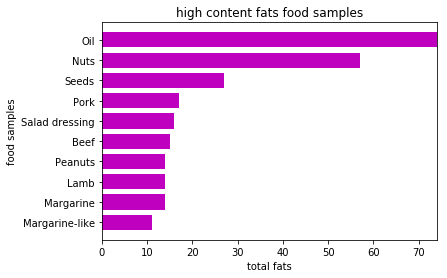

In [6]:
# fisrt 20 samples with exceeding high fats
outliers_based_fats_df = pd.DataFrame(get_outliers('total_fat(g)')).tail(10)
outliers_based_fats_df.reset_index(inplace=True)
x = list(outliers_based_fats_df['index'])
y = list(outliers_based_fats_df['food_categories'])
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="m", align='edge')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
#plt.xticks(np.arange(5),('Pre-clinical','Phase I','Phase II','Phase III', 'Approved'))
plt.margins(0,0.05)
plt.xlabel('total fats')
plt.ylabel('food samples')
plt.title('high content fats food samples')
plt.show()

## (Visualization 5)
>summaryly the following relationships where found between our majors features and calories content:

>1. calories level increase only seemingly with carbohydrates
2. calories levels increase steeply with total fats
3. calories level also increase seemingly with calories but not as carbohydrates

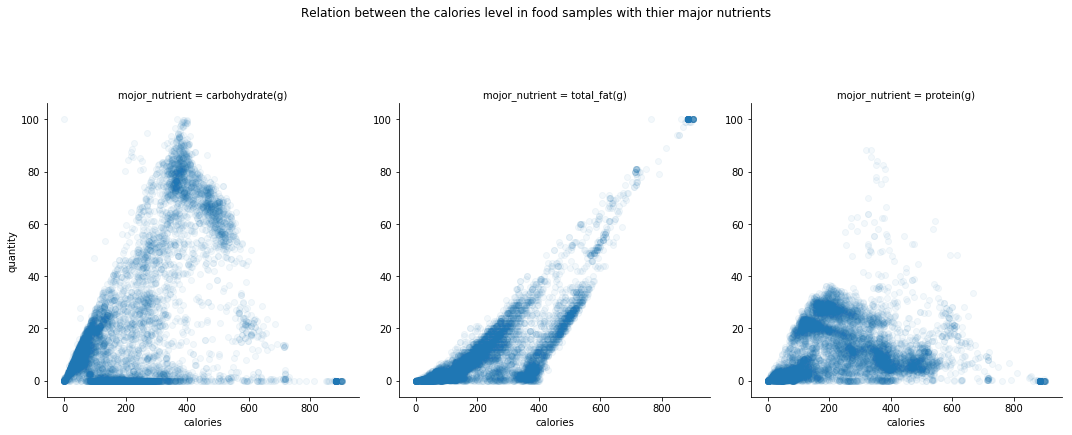

In [54]:
##let us melt the variables barbihydrates, proteins, and fats into a categorial variable

nutrients_mlt = nutrients_df.melt(id_vars = 'calories', value_vars=['carbohydrate(g)','total_fat(g)','protein(g)'], var_name='mojor_nutrient', value_name='quantity')
## using a facetGrid let plot our 03 variables againt thier contributions to calories
fig = plt.figure(figsize=[15, 20]);
fig = sb.FacetGrid(data = nutrients_mlt, col = 'mojor_nutrient', size = 5)
_= g.map(plt.scatter, 'calories', 'quantity', alpha = 1/20);
_=plt.suptitle("\n".join(["Relation between the calories level in food samples with thier major nutrients"]), y=1.2);

At the end of the analysis, we could comfortable say on the bases of the reliability of the source of our data, that fats contribute to the highest percentage of the calories level of foods, and this is followed by proteins which also contribute well especially when fats are absent like in meat, well we could not neglect the contribution of carbohydrates but that is very low as compared with the others